In [2]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt
from IPython import embed
from IPython.terminal.embed import InteractiveShellEmbed
import transform_by4 as tr
from IPython import embed
%matplotlib inline

In [3]:
empty = cv2.imread('empty.jpg')

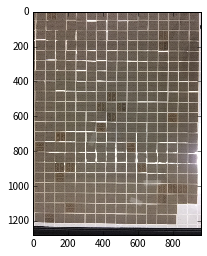

In [4]:
plt.imshow(cv2.cvtColor(empty,  cv2.COLOR_BGR2RGB))

In [5]:
gray_empty = cv2.cvtColor(empty, cv2.COLOR_BGR2GRAY)

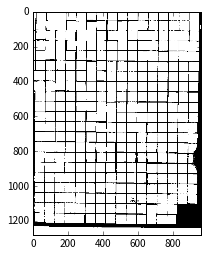

In [6]:
thresh, bin_img = cv2.threshold(gray_empty, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray')

In [8]:
height, width= gray_empty.shape

In [7]:
plt.imshow(gray_empty[height/2:height, width/2:width], cmap='gray')

NameError: name 'height' is not defined

In [10]:
cv2.imshow('image', lined_empty)

NameError: name 'lined_empty' is not defined

In [11]:
cv2.line(gray_empty, (0, 300), (400, 300), (0, 0, 255), 5)

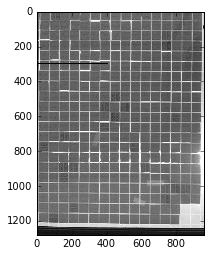

In [12]:
plt.imshow(gray_empty, cmap = 'gray')

In [13]:
# 画像を分割する
line_span = 50
height_start = line_span
height_stop = height - line_span
width_start = line_span
width_stop= width - line_span
line_color = (0, 255, 0)
line_style = 5 

for line_height in range(height_start, height_stop, line_span):
    cv2.line(gray_empty, (0, line_height), (width, line_height), line_color, line_style)
    for line_width in range(width_start, width_stop, line_span):
        cv2.line(gray_empty, (line_width, 0), (line_width, height), line_color, line_style)
        

    

In [25]:
# import numpy as np
# cap = cv2.VideoCapture()

# while(True):
#     ret, frame = cap.read()
    
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
#     cv2.imshow('frame', gray)
#     if cv2.waitKey(1) % 0xFF == ord('q'):
#         break
        
# cap.release()
# cv2.destroyAllWindows()

error: /Users/jenkins/miniconda/0/2.7/conda-bld/work/opencv-2.4.11/modules/imgproc/src/color.cpp:3739: error: (-215) scn == 3 || scn == 4 in function cvtColor


### アプリケーション設計
1. グレーフレームを取得する
2. 前のフレームとの差分を取る
3. 前のフレームとの差分を2値化する
4. 差分が閾値を超えるか計算する
5. キャプチャを終了する　=> いらない？
6. 何らかのキーを押せば中止できるようにする 

In [ ]:
# キャプチャを解放する
import numpy as np
import cv2

embed()

# cap = cv2.VideoCapture(0)

# while(True):
#     ret, frame = cap.read()
# #     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#     cv2.imshow('frame', frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
    
#     before_frame = frame
#     if before_frame:
#         diff = cv2.absdiff(before_frame, frame)
#         binary_diff = cv2.
        
# cap.release()
# cv2.destroyAllWindows()

Python 2.7.12 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:43:17) 
Type "copyright", "credits" or "license" for more information.

IPython 4.2.0 -- An enhanced Interactive Python.
?         -> Introduction and overview of IPython's features.
%quickref -> Quick reference.
help      -> Python's own help system.
object?   -> Details about 'object', use 'object??' for extra details.

In [1]: cv2.VideoCapture(0)
Out[1]: <VideoCapture 0x10b4439b0>

In [2]: cv2.VideoCapture(1)
Out[2]: <VideoCapture 0x10b4439f0>


In [ ]:
gray = cv2.CvtColor(img, cv2.COLOR_RGB2GRAY)

In [23]:
cap = cv2.VideoCapture()
cap

<VideoCapture 0x10b25ca50>

In [1]:
def detector(cap, detect_rect):
    detect = False
    prev_frame = None
    crt_frame  = None
    while True:
        start = time.time()
        # get frame
        #frame = get_frame(cap)
        crt_frame = get_gray_frame(cap)

        if prev_frame is not None:
            # diff frame
            diff_frame = cv2.absdiff(crt_frame, prev_frame)
            # binary frame
            diff_b_frame = cv2.threshold(diff_frame, 50, 255, cv2.THRESH_BINARY)[1]
            cv2.imshow('processing preview', diff_b_frame)
            detect, ratio = check_detect(diff_b_frame, detect_rect)
        if detect:
        # destroy window
        cv2.destroyAllWindows()
        return crt_frame

        # display frame
        cv2.imshow('camera preview', crt_frame)
        if cv2.waitKey(250) == 27: # wait 250 msec / finish by ESC key
            break
            
        prev_frame = crt_frame
        elapsed_time = time.time() - start
        sys.stdout.write('elapsed_time {:3.3f} [s] \r'.format(1 / elapsed_time))
        sys.stdout.flush()

    # destroy window
    cv2.destroyAllWindows()
    return None

IndentationError: expected an indented block (<ipython-input-1-7613fb28b551>, line 13)

In [ ]:
def check_detect(b_frame, detect_rect):
    detect_rect.modify()
    window = b_frame[detect_rect.y : detect_rect.y + detect_rect.h, detect_rect.x : detect_rect.x + detect_rect.w]
    #check change ratio of binary values
    ratio = np.mean(window) / 255
    if ratio > 0.2:
        return True, ratio
    return False, ratio

In [ ]:
# save image
if initial_img is not None:
    save_image('./save', '0_initial_image_with_rect.png', initial_img)
if detect_img is not None:
    save_image('./save', '1_detect_image.png', detect_img)
    cv2.rectangle(detect_img, (detect_rect.x, detect_rect.y), (detect_rect.x + detect_rect.w, detect_rect.y + detect_rect.h), (255, 255, 255), 2)
    save_image('./save', '2_detect_image_with_rect.png', detect_img)

In [ ]:
class Rect:
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def modify(self):
        if self.w < 0:
            self.w *= -1
            self.x -= self.w
        if self.h < 0:
            self.h *= -1
            self.y -= self.h
            

class Meta:
    def __init__(self, window_name, img, rect):
        self.img = img
        self.img_bk =np.copy(img)
        self.rect = rect
        self.window_name = window_name

def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:		
        param.img = np.copy(param.img_bk)
        param.rect.x = x
        param.rect.y = y
    if event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        param.img = np.copy(param.img_bk)
        param.rect.w = x - param.rect.x
        param.rect.h = y - param.rect.y
        cv2.rectangle(param.img, (param.rect.x, param.rect.y), (param.rect.x + param.rect.w, param.rect.y + param.rect.h), (255, 255, 255), 2)
        cv2.imshow(param.window_name, param.img)
    if event == cv2.EVENT_LBUTTONUP:
        param.img = np.copy(param.img_bk)
        param.rect.w = x - param.rect.x
        param.rect.h = y - param.rect.y
        cv2.rectangle(param.img, (param.rect.x, param.rect.y), (param.rect.x + param.rect.w, param.rect.y + param.rect.h), (255, 255, 255), 2)
        cv2.imshow(param.window_name, param.img)
        
def configure_detect_rectangle(cap):
    crt_frame = get_gray_frame(cap)
    window_name = 'configure detect rectangle'
    detect_rect = Rect(0, 0, 0, 0)
    meta = Meta(window_name, crt_frame, detect_rect)
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(window_name, mouse_event, meta)
    cv2.imshow(window_name, crt_frame)
    while True:
        if cv2.waitKey(1) == 27: # wait 1msec / finish by ESC key
            break
    cv2.destroyAllWindows()
    return detect_rect, meta.img

小椋君が欲しいもの
-UCwin-roadみたくある道路上をランダムに動き回るかをシミュレーションしたい
全員で八郷のUnityの方をやる
-道路を引くのはそんなに正確にやらなくてもいい
-

見えてること
道路を決めた時にそこにランダムに交通が発生するシミュレーションはまだできない。
車に道路を与えた時にそれを道路上を動かすというのは難しい

道路上を動かす
-基本前にすすむ
-右左折はランダム
-前に車がいたら進まない

車がどこのポイントを動けるのかは制約をつければできる



-ARCGIS上での座標系の情報がUnity上では失われるから道路情報をUnity常に反映する時座標系はどうなるのか
-2000px×2000pxのデータでの道路を離散化した座標
-webカメラを買おう



## レゴプロジェクト本番
参考:http://motojapan.hateblo.jp/entry/2017/05/07/155218

In [9]:
# カメラ起動
# 1秒ごとにカメラからのキャプチャを表示し続け、Escが押されたら終了する
def start_preview(device_id):
    cap = cv2.VideoCapture(device_id)
    while True:
        start = time.time()
        frame = get_gray_frame(cap)
        
        cv2.imshow('camera preview', frame)
        if cv2.waitKey(1) == 27:
            break
            
        elapsed_time = time.time - start
        sys.stdout.write('elapsed_time {:3.3f} [s] \r'.format(1 / elapsed_time))
        sys.stdout.flush()
        
    cv2.destroyAllWindows()
    cap.release()# グレーフレーム画像を取得
    
def get_gray_frame(cap):
    res, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    return gray



In [6]:
# 初期値にfalseを設定する
# ビデオキャプチャをグレーフレーム化する
# 前のフレームがあれば、新たなフレームとの差分を取り、二値化する
def detector(cap, detect_rect):
    detect = False
    prev_frame = False
    crt_frame = False
    while True:
        start = time.time()
        crt_frame = get_gray_frame(cap)
        
        if prev_frame is not None:
            diff_frame = cv2.absdiff(crt_frame, prev_frame)
            deff_b_frame = cv2.threshold(diff_frame, 50, 255, cv2.THRESH_BINARY)
            cv2.imshow('processing preview', diff_b_frame)
            detect, retio = check_detect(diff_b_frame, detect_rect)
            
        if detect:
            cv2.destroyAllWindows()
            return crt_frame
        
        cv2.imshow('camera preview', crt_frame)
        elapsed_time = time.time() - start
        sys.stdout.write('elapsed_time {:3.3f} [s] \r'.format(1 / elapsed_time))
        sys.stdout.flush()
    
    cv2.destroyAllWindows()
    return None

In [ ]:
# 初期値にfalseを設定する
# ビデオキャプチャをグレーフレーム化する
# 前のフレームがあれば、新たなフレームとの差分を取り、二値化する
def detector(cap, detect_rect):
    detect = False
    prev_frame = False
    crt_frame = False
    detect_count = 0
    while True:
        start = time.time()
        crt_frame = get_gray_frame(cap)
        
        if prev_frame is not None:
            diff_frame = cv2.absdiff(crt_frame, prev_frame)
            deff_b_frame = cv2.threshold(diff_frame, 50, 255, cv2.THRESH_BINARY)
            cv2.imshow('processing preview', diff_b_frame)
            detect, retio = check_detect(diff_b_frame, detect_rect)
            
        if detect:
            detect_count = 0
#             cv2.destroyAllWindows()
#             return crt_frame
        else:
            detect_count += 1
            
        if detect_count >= 5:
            cv2.destroyAllWindows()
            if before_frame is not None:
                after_frame  = crt_frame
            else:
                before_frame = crt_frame
            # return crt_frame
        
        if prev_frame is not None and crt_frame is not None:
            diff_bf_frame = cv2.absdiff(crt_frame, prev_frame)
        
        # display frame
 		cv2.imshow('camera preview', crt_frame)
		if cv2.waitKey(250) == 27: # wait 250 msec / finish by ESC key
			break

		prev_frame = crt_frame
# 		elapsed_time = time.time() - start
# 		sys.stdout.write('elapsed_time {:3.3f} [s] \r'.format(1 / elapsed_time))
# 		sys.stdout.flush()

	# destroy window
	cv2.destroyAllWindows()
	return None

## 今後の課題
-check_detectの実装
-諸設定の実装
-諸設定の実装
-スタンドアロンスクリプトでの表示
-実機テスト

In [7]:
def check_detect(b_frame, detect_rect):
    detect_rect.modify()
    window = b_frame[delect_rect.y : detect_rect.y + detect_rect.h, detect_rect.x : detect_rect.x + detect_rect.w]
    ratio = np.mean(window) / 255
    if ratio > 0.2:
        return True, ratio
    return False, ratio

In [8]:
if initial_img is not None:
    save_image('./save', '0_initial_image_with_rect.png', initial_img)
if detect_img is not None: 
    save_image('./save', '1_detect_image.png', detect_img)
    cv2.rectangle(detect_img, (detect_rect.x, detect_rect.y), (detect_rect.x + detect_rect.w, detect_rect.y + detect_rect.h), (255, 255, 255), 2)
    save_image('./save', '2_detect_image_with_rect.png', detect_img)

NameError: name 'initial_img' is not defined

In [10]:
class Rect:
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h

    def modify(self):
        if self.w < 0:
            self.w *= -1
            self.x -= self.w
        if self.h < 0:
            self.h *= -1
            self.y -= self.h

class Meta:
    def __init__(self, window_name, img, rect):
        self.img = img
        self.img_bk =np.copy(img)
        self.rect = rect
        self.window_name = window_name
        
# http://rasp.hateblo.jp/entry/2016/01/24/204539
# クリックされる、マウスが動く、クリックが外されるのそれぞれのアクションごとに座標を取得し、アクションごとに画像に矩形の書き込みを行う
# ドラッグした範囲のみを矩形として書き込むためには、イベントごとに書き込み先の画像をリフレッシュする必要がある。
# cv2.rectangle()は常に第一引数に矩形を書き込むため。
def mouse_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        param.img = np.copy(param.img_bk)
        param.rect.x = x
        param.rect.y = y
    if event == cv2.EVENT_MOUSEMOVE and flags == cv2.EVENT_FLAG_LBUTTON:
        param.img = np.copy(param.img_bk)
        param.rect.w = x - param.rect.x
        param.rect.h = y - param.rect.y
        cv2.rectangle(param.img, (param.rect.x, param.rect.y), (param.rect.x + param.rect.w, param.rect.y + param.rect.h), (255, 255, 255), 2)
        cv2.imshow(param.window_name, param.img)
    if event == cv2.EVENT_LBUTTONUP:
        param.img = np.copy(param.img_bk)
        param.rect.w = x - param.rect.x
        param.rect.h = y - param.rect.y
        cv2.rectangle(param.img, (param.rect.x, param.rect.y), (param.rect.x + param.rect.w, param.rect.y + param.rect.h), (255, 255, 255), 2)
        cv2.imshow(param.window_name, param.img)

def configure_detect_rectangle(cap):
    crt_frame = get_gray_frame(cap)
    window_name = 'configure detect rectangle'
    detect_rect = Rect(0, 0, 0, 0)
    meta = Meta(window_name, crt_frame, detect_rect)
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.setMouseCallback(window_name, mouse_event, meta)
    cv2.imshow(window_name, crt_frame)
    while True:
        if cv2.waitKey(1) == 27: # wait 1msec / finish by ESC key
            break
    cv2.destroyAllWindows()
    return detect_rect, meta.img

アプリケーション詳細設計  
・アプリ起動時に画像を保存しておく  
・5フレーム以上動きがなかった場合、その最後のフレームを保存する  
・最初と最後の差分を取り、csvにする